### These are the packages which are going to be used 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import statsmodels.formula.api as sm
import copy

In [55]:
Automobile = pd.read_csv("G:\Project\Automobile Data Set.csv" , na_values="?" )           # Reading the dataset 

####  I have converted the missing values "?" into NA's so that it would be easy to find them in the dataset and replace them. 

In [56]:
Automobile.head()                                                      # First few observations of the dataset  

,symboling,losses,make,fuel-type,aspiration,doors,style,wheels,location,base,...,size,fuel,bore,stroke,compression,horsepower,peak,mlg,highway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [57]:
list(Automobile.columns)

['symboling',
 'losses',
 'make',
 'fuel-type',
 'aspiration',
 'doors',
 'style',
 'wheels',
 'location',
 'base',
 'length',
 'width',
 'height',
 'weight',
 'engine',
 'cylinders',
 'size',
 'fuel',
 'bore',
 'stroke',
 'compression',
 'horsepower',
 'peak',
 'mlg',
 'highway',
 'price']

In [58]:
Automobile.info()                                            # Structure of the dataset####  I have converted the missing values "?" into NA's so that it would be easy to find them in the dataset and replace them. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling      205 non-null int64
losses         164 non-null float64
make           205 non-null object
fuel-type      205 non-null object
aspiration     205 non-null object
doors          203 non-null object
style          205 non-null object
wheels         205 non-null object
location       205 non-null object
base           205 non-null float64
length         205 non-null float64
width          205 non-null float64
height         205 non-null float64
weight         205 non-null int64
engine         205 non-null object
cylinders      205 non-null object
size           205 non-null int64
fuel           205 non-null object
bore           201 non-null float64
stroke         201 non-null float64
compression    205 non-null float64
horsepower     203 non-null float64
peak           203 non-null float64
mlg            205 non-null int64
highway        205 non-null int64
price          

In [59]:
Automobile.describe(include="all")                        # Summary of the dataset

,symboling,losses,make,fuel-type,aspiration,doors,style,wheels,location,base,...,size,fuel,bore,stroke,compression,horsepower,peak,mlg,highway,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


### Checking for any null values

In [60]:
Automobile.isnull().sum()

symboling       0
losses         41
make            0
fuel-type       0
aspiration      0
doors           2
style           0
wheels          0
location        0
base            0
length          0
width           0
height          0
weight          0
engine          0
cylinders       0
size            0
fuel            0
bore            4
stroke          4
compression     0
horsepower      2
peak            2
mlg             0
highway         0
price           4
dtype: int64

### Cleaning and Transformation

#### 1. Cleaning the Losses column

In [61]:
Automobile.losses.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: losses, dtype: float64

In [62]:
Automobile.losses.mean()

122.0

In [63]:
Automobile.losses = Automobile.losses.fillna(Automobile.losses.mean())      # Replced NA values into mean of losses column

In [64]:
Automobile.losses.isnull().sum()                     # Confirming whether they are replaced or not

0

#### 2. Cleaning the bore column

In [65]:
Automobile.bore.describe()                              # Checking the summary for bore column

count    201.000000
mean       3.329751
std        0.273539
min        2.540000
25%        3.150000
50%        3.310000
75%        3.590000
max        3.940000
Name: bore, dtype: float64

In [66]:
Automobile.bore.isnull().sum()                            # Checking the no. of NA's present

4

In [67]:
Automobile.bore = Automobile.bore.fillna(Automobile.bore.mean())         # Replced NA values into mean of bore column

In [68]:
Automobile.bore.isnull().sum()                  # Confirming whether they are replaced or not

0

#### 3. Cleaning the stroke column

In [69]:
Automobile.stroke.describe()                       # Checking the summary for stroke column

count    201.000000
mean       3.255423
std        0.316717
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [70]:
Automobile.stroke.isnull().sum()                    # Checking the no. of NA's present

4

In [71]:
Automobile.stroke = Automobile.stroke.fillna(Automobile.stroke.mean())           # Replced NA values into mean of stroke column

In [72]:
Automobile.stroke.isnull().sum()                     # Confirming whether they are replaced or not

0

#### 4. Cleaning the horsepower column

In [73]:
Automobile.horsepower.describe()                       # Checking the summary for horsepower column

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [74]:
Automobile.horsepower.isnull().sum()                    # Checking the no. of NA's present

2

In [75]:
Automobile.horsepower = Automobile.horsepower.fillna(Automobile.horsepower.median())           # Replced NA values into mean of horsepower column

In [76]:
Automobile.horsepower.isnull().sum()                     # Confirming whether they are replaced or not

0

#### 5. Cleaning the peak column

In [77]:
Automobile.peak.describe()                       # Checking the summary for peak column

count     203.000000
mean     5125.369458
std       479.334560
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak, dtype: float64

In [78]:
Automobile.peak.isnull().sum()                    # Checking the no. of NA's present

2

In [79]:
Automobile.peak = Automobile.peak.fillna(Automobile.peak.mean())           # Replced NA values into mean of peak column

In [80]:
Automobile.peak.isnull().sum()                     # Confirming whether they are replaced or not

0

#### 6. Cleaning the Price column

In [81]:
Automobile.price.describe()                       # Checking the summary for stroke column

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [82]:
Automobile.price.isnull().sum()                    # Checking the no. of NA's present

4

In [83]:
Automobile.price = Automobile.price.fillna(Automobile.price.mean())           # Replced NA values into mean of stroke column

In [84]:
Automobile.price.isnull().sum()                     # Confirming whether they are replaced or not

0

#### 7. Cleaning the doors column

In [85]:
Automobile.doors.describe()             # Checking the frequency count for doors column

count      203
unique       2
top       four
freq       114
Name: doors, dtype: object

In [86]:
Automobile.doors.isnull().sum()        # As there are 2 NA values , replacing them with high occurence of door column

2

In [87]:
Automobile.doors = Automobile.doors.fillna("four")         # replaced them with high occurence of door column

In [88]:
Automobile.doors.isnull().sum()              # Confirming whether they are replaced or not

0

In [89]:
Automobile.isnull().sum()

symboling      0
losses         0
make           0
fuel-type      0
aspiration     0
doors          0
style          0
wheels         0
location       0
base           0
length         0
width          0
height         0
weight         0
engine         0
cylinders      0
size           0
fuel           0
bore           0
stroke         0
compression    0
horsepower     0
peak           0
mlg            0
highway        0
price          0
dtype: int64

#### Now we are done with cleaning the data ,  I'll perform some Exploratory Data Analysis

### Exploratory Data Analysis

In [90]:
Automobile.describe(include="all")

,symboling,losses,make,fuel-type,aspiration,doors,style,wheels,location,base,...,size,fuel,bore,stroke,compression,horsepower,peak,mlg,highway,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.165854,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.529733,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [91]:
Automobile.columns                               # Column names of dataset

Index(['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'doors',
       'style', 'wheels', 'location', 'base', 'length', 'width', 'height',
       'weight', 'engine', 'cylinders', 'size', 'fuel', 'bore', 'stroke',
       'compression', 'horsepower', 'peak', 'mlg', 'highway', 'price'],
      dtype='object')

In [92]:
Automobile = Automobile.rename(columns={"fuel-type":"fueltype", "style":"Style","size": "Size"})  # Renaming some column name

In [93]:
Automobile2 = copy.deepcopy(Automobile)            # Creating a copy of Automobile dataset

### 1. Unique Car manufacturer

In [94]:
print("The unique car Manufacturer are:" , Automobile.make.unique())

The unique car Manufacturer are: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


#### Plotting each manufacturer's car count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

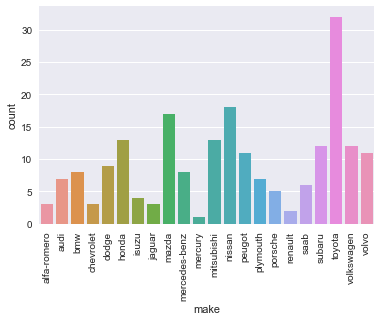

In [100]:
sns.countplot(Automobile.make  )                        # Countplot for each manufacturer's car count
plt.xticks(rotation = "vertical")

### 2. Each car's type

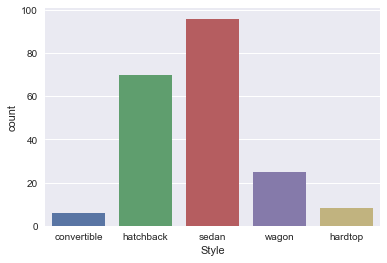

In [101]:
sns.countplot(Automobile["Style"]  )                        # Countplot for each car's type

### 3. Mileage per car on Highway

In [106]:
mpg = Automobile.groupby(["make"]).mean()
mpg

,symboling,losses,base,length,width,height,weight,Size,bore,stroke,compression,horsepower,peak,mlg,highway,price
make,,,,,,,,,,,,,,,,
alfa-romero,2.333333,122.000000,90.566667,169.600000,64.566667,50.000000,2639.666667,137.333333,3.206667,2.943333,9.000000,125.333333,5000.000000,20.333333,26.666667,15498.333333
audi,1.285714,144.285714,102.271429,183.828571,68.714286,54.428571,2800.714286,130.714286,3.172857,3.400000,8.400000,121.000000,5500.000000,18.857143,24.142857,17194.589908
bmw,0.375000,156.000000,103.162500,184.500000,66.475000,54.825000,2929.375000,166.875000,3.473750,3.167500,8.575000,138.875000,5068.750000,19.375000,25.375000,26118.750000
chevrolet,1.000000,100.000000,92.466667,151.933333,62.500000,52.400000,1757.000000,80.333333,2.990000,3.083333,9.566667,62.666667,5300.000000,41.000000,46.333333,6007.000000
dodge,1.000000,133.444444,95.011111,160.988889,64.166667,51.644444,2151.333333,102.666667,3.094444,3.365556,8.634444,86.333333,5388.888889,28.000000,34.111111,7875.444444
honda,0.615385,103.000000,94.330769,160.769231,64.384615,53.238462,2096.769231,99.307692,3.021538,3.462308,9.215385,80.230769,5753.846154,30.384615,35.461538,8184.692308
isuzu,0.750000,122.000000,94.825000,163.775000,63.550000,52.225000,2213.500000,102.500000,3.200000,3.170000,9.225000,77.000000,5150.000000,31.000000,36.000000,11061.814677
jaguar,0.000000,129.666667,109.333333,196.966667,69.933333,51.133333,4027.333333,280.666667,3.600000,3.700000,9.233333,204.666667,4833.333333,14.333333,18.333333,34600.000000
mazda,1.117647,123.705882,97.017647,170.805882,65.588235,53.358824,2297.823529,103.000000,3.297000,3.288923,10.488235,85.529412,5108.823529,25.705882,31.941176,10652.882353


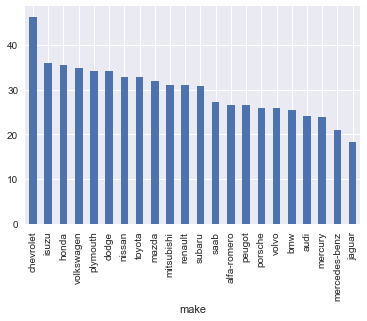

In [107]:
mpg["highway"].sort_values(ascending=False).plot.bar()
plt.show()

### 4. mean Mileage per car in City

In [99]:
mpg = Automobile.groupby(["make"]).mean()

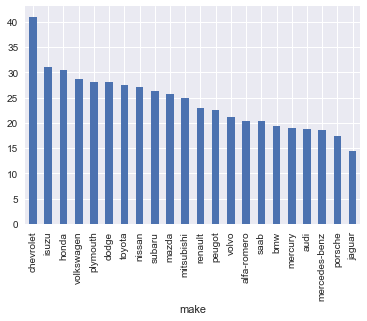

In [46]:
mpg["mlg"].sort_values(ascending=False).plot.bar()

### 5. mean Horsepower per Car

In [47]:
hp = Automobile.groupby(["make"]).mean()

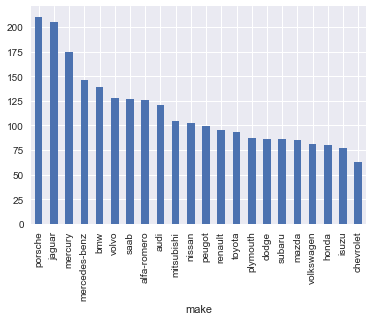

In [108]:
mpg["horsepower"].sort_values(ascending=False).plot.bar()

### 6. Pie charts for Categorical Column

#### I. No of doors present in %

In [109]:
names = np.unique(Automobile.doors)                 # Door column's names
count = Automobile.doors.value_counts()             # Door columns value count

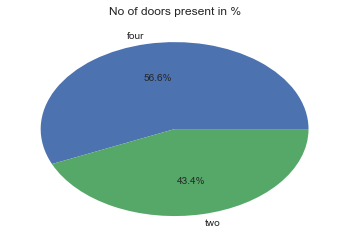

In [111]:
plt.pie(count , labels=names , autopct="%1.1f%%" )         # Pie chart of doors column
plt.title("No of doors present in %")

#### II. No. of different Car types(Style) in %

In [113]:
names1 = np.unique(Automobile.Style)                 # Style column's names
count1 = Automobile.Style.value_counts()             # Style columns value count

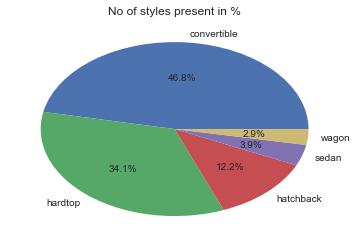

In [114]:
plt.pie(count1 , labels=names1 , autopct="%1.1f%%" )         # Pie chart of Style column
plt.title("No of styles present in %")

### 7. Top 5 manufacturer's car type and their prices

In [115]:
cars = (Automobile.make == "alfa-romero") | (Automobile.make == "audi") | (Automobile.make == "bmw") | (Automobile.make == "chevrolet") | (Automobile.make == "dodge" )

In [116]:
cars = Automobile[cars]

In [117]:
cars.head()

,symboling,losses,make,fueltype,aspiration,doors,Style,wheels,location,base,...,Size,fuel,bore,stroke,compression,horsepower,peak,mlg,highway,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [118]:
names3 = np.unique(cars.make)                 # Make column's names
count3 = cars.make.value_counts()             # Make columns value count

([<matplotlib.patches.Wedge at 0x54a5a185f8>,
  <matplotlib.text.Text at 0x54a5a2a2e8>])

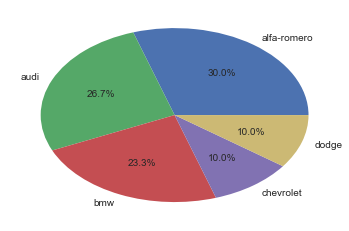

In [119]:
plt.pie(count3 , labels=names3 , autopct="%1.1f%%")

#### No.of top 5 Car Manufactures(Make) in %

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


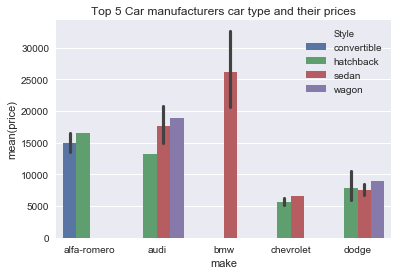

In [120]:
sns.barplot(cars.make , cars.price , hue=cars.Style)
plt.title("Top 5 Car manufacturers car type and their prices")

### 8. Prices of different car manufacturer

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

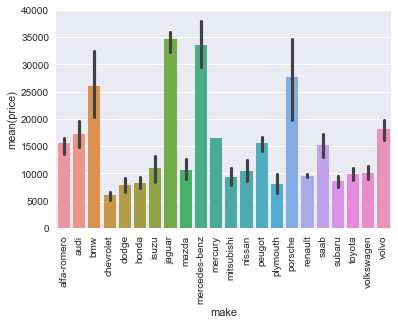

In [121]:
sns.barplot(Automobile.make , Automobile.price)            # Barplot of make vs Price
plt.xticks(rotation = "vertical")                          # putting x axis names in vertical shape

#### Companies like BMW , Mercedes-benz , Porsche and Jaguar High budget models whereas Chevrolet, Dodge, Honda, Plymouth produces Low budget models

### 9. Prices of different car models

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

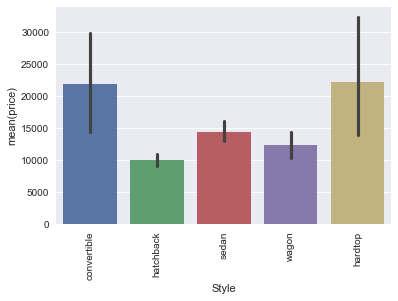

In [122]:
sns.barplot(Automobile.Style , Automobile.price)           # Barplot of Style vs Price
plt.xticks(rotation = "vertical")                          # putting x axis names in vertical shape

#### Convertible and Hardtop cars have high no. of price range

### 10. Cylinders vs Horsepower

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


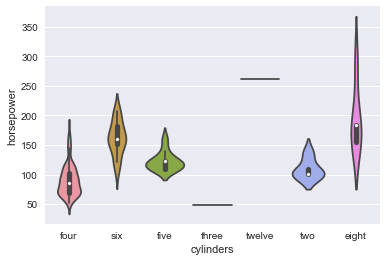

In [123]:
sns.violinplot(Automobile.cylinders , Automobile.horsepower)

#### Vehicle with above 200 HP has 6 , 8, 12 cylinders

### 11. Calculating Losses per Risk

In [124]:
le = LabelEncoder()

In [125]:
Automobile.symboling = le.fit_transform(Automobile.symboling)

In [126]:
Automobile.symboling = Automobile.symboling.astype("category")

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


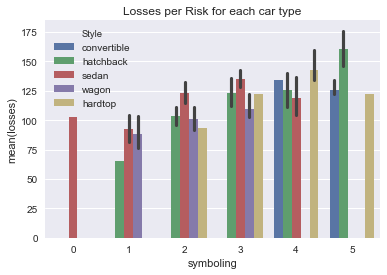

In [127]:
sns.barplot(Automobile.symboling , Automobile.losses , hue=Automobile.Style)
plt.title("Losses per Risk for each car type")

#### Incresed in Risk taking increases Losses                                                                                                                                                        #### For Hatchback losses are low if the risk is low and vice versa                                                                                                                      #### Hatchback cars have Highest loss at Risk taking 3 

#### Sedan car has losses in each Risk taking

### 12. ScatterPlot of Price vs Engine Size

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


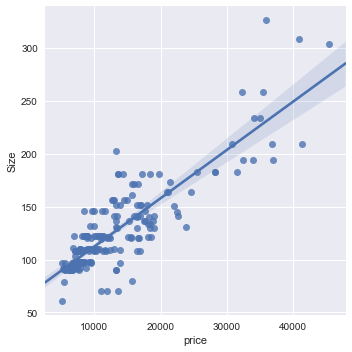

In [128]:
sns.lmplot("price" ,"Size" , data= Automobile)

#### The more the engine size the costlier prices are

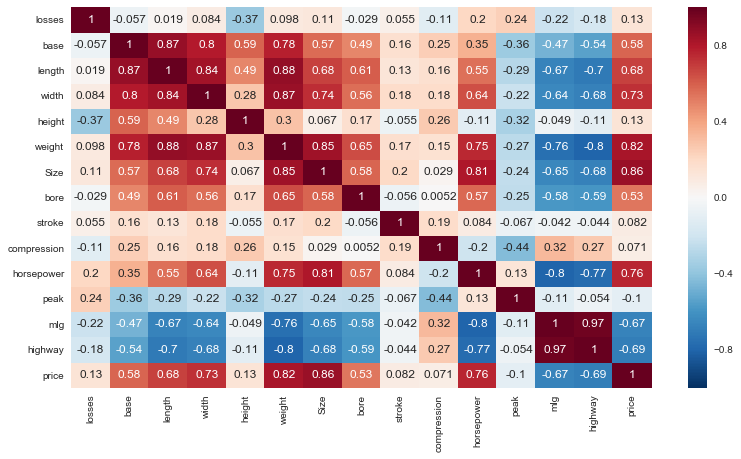

In [138]:
corr = Automobile.corr()
#sns.set_context("notebook", font_scale=1.0)
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True)

#### From above it is clear that size ,weight , horsepower, stroke, mlg, width are highly correlated. 

### 13. Histogram on some imp Car Attributes

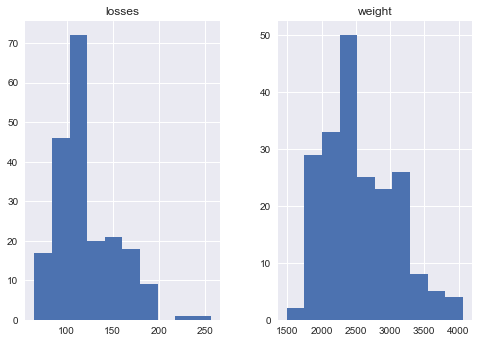

In [139]:
Automobile[['losses',"weight"]].hist()                 # Histogram of Losses and Weight
plt.show()

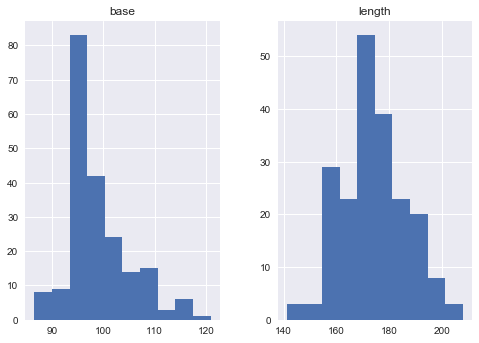

In [140]:
Automobile[['base','length']].hist()                      # Histogram of base and length
plt.show()

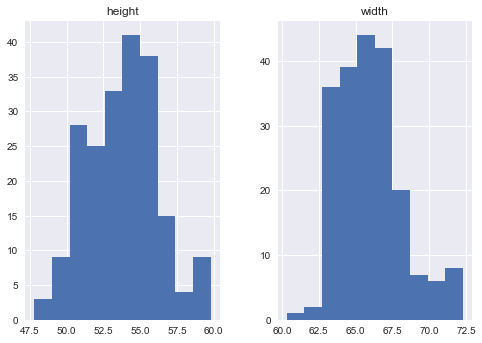

In [141]:
Automobile[['width','height']].hist()                            # Histogram of weight and height
plt.show()

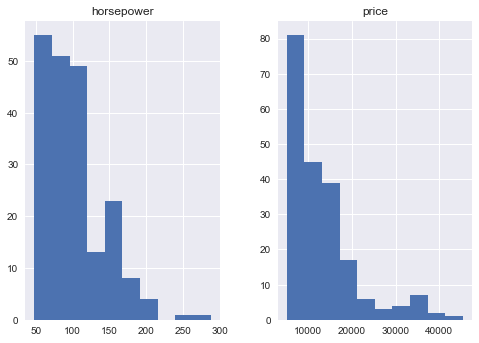

In [142]:
Automobile[['price','horsepower']].hist()                         # Histogram of price and horsepower  
plt.show()

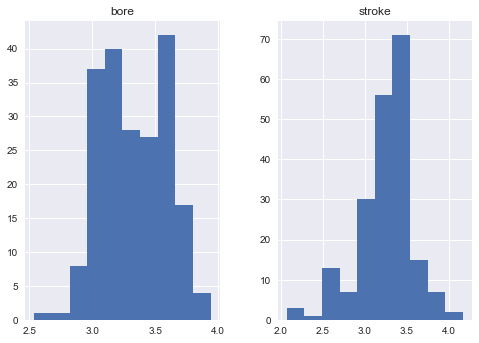

In [143]:
Automobile[['bore','stroke']].hist()                              # Histogram of Bore and Stroke
plt.show()

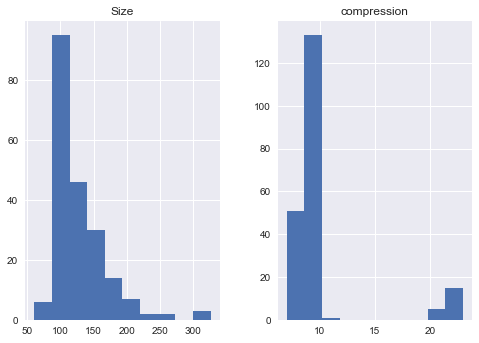

In [144]:
Automobile[['Size','compression']].hist()                              # Histogram of size and compression
plt.show()

### Using a copy Automobile2 data to use it for Transformation and Model Building

In [145]:
Automobile2.describe(include="all")                       # Summary

,symboling,losses,make,fueltype,aspiration,doors,Style,wheels,location,base,...,Size,fuel,bore,stroke,compression,horsepower,peak,mlg,highway,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.165854,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.529733,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [146]:
Automobile2.info()                                 # Structure of the Automobile2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling      205 non-null int64
losses         205 non-null float64
make           205 non-null object
fueltype       205 non-null object
aspiration     205 non-null object
doors          205 non-null object
Style          205 non-null object
wheels         205 non-null object
location       205 non-null object
base           205 non-null float64
length         205 non-null float64
width          205 non-null float64
height         205 non-null float64
weight         205 non-null int64
engine         205 non-null object
cylinders      205 non-null object
Size           205 non-null int64
fuel           205 non-null object
bore           205 non-null float64
stroke         205 non-null float64
compression    205 non-null float64
horsepower     205 non-null float64
peak           205 non-null float64
mlg            205 non-null int64
highway        205 non-null int64
price          

### Coverting Categorical Columns into 0's and 1's using Label encoder and One hot encoding

#### I'll create Some categorical column into 0's and 1's using Label Encoder and rest using One Hot Encoding

In [147]:
le = LabelEncoder()                                # Creating an instance

In [148]:
category_le = Automobile2.loc[:,["make","Style","wheels","engine","cylinders","fuel" , "symboling"]]        # Columns which are using Label Encoder

In [149]:
category_ohe = Automobile2.loc[:,["fueltype","aspiration","doors","location"]]        # Columns which are using One hot Encoding 

#### Converting "category_le" dataset's columns into 0's and 1's using Label Encoder 

In [150]:
for k in category_le:                                               # for loop
    category_le[k] = le.fit_transform(category_le[k])               # converting into 0's and 1's

In [151]:
category_le.describe(include="all")                                # summary of category_le

,make,Style,wheels,engine,cylinders,fuel,symboling
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,12.195122,2.614634,1.326829,3.014634,2.117073,3.253659,2.834146
std,6.274831,0.859081,0.556171,1.054765,0.795792,2.013204,1.245307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,12.000000,3.000000,1.000000,3.000000,2.000000,5.000000,3.000000
75%,19.000000,3.000000,2.000000,3.000000,2.000000,5.000000,4.000000
max,21.000000,4.000000,2.000000,6.000000,6.000000,7.000000,5.000000


#### Converting "category_ohe" dataset's column into 0's and 1's using One Hot Encoding

In [152]:
category_ohe = pd.get_dummies(category_ohe, columns=["fueltype","aspiration","doors","location"])    # Converted these columns into 0's and 1's using One hot encoding

In [153]:
category_ohe.head()                             # First 6 observations

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doors_four,doors_two,location_front,location_rear
0,0,1,1,0,0,1,1,0
1,0,1,1,0,0,1,1,0
2,0,1,1,0,0,1,1,0
3,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0


In [154]:
category_ohe.describe()                                        # Summary 

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doors_four,doors_two,location_front,location_rear
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.902439,0.819512,0.180488,0.565854,0.434146,0.985366,0.014634
std,0.297446,0.297446,0.385535,0.385535,0.496858,0.496858,0.120377,0.120377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Now from Automobile2 , I'll remove all the categorical columns and will replce them with above converted categorical columns

In [155]:
Automobile2.shape                                    # Dimensions

(205, 26)

In [156]:
Automobile2 =Automobile2.loc[:,["losses","base","length","width","height","weight","Size","bore","stroke","compression","horsepower","peak","mlg","highway","price"]]
# Kept only continuous columns


In [157]:
Automobile2.head()                      # dataset containg only continuous values

,losses,base,length,width,height,weight,Size,bore,stroke,compression,horsepower,peak,mlg,highway,price
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Now I'll concat converted categorical columns to Automobile1 dataset

In [158]:
Automobile2 = pd.concat([Automobile2 , category_le , category_ohe] , axis=1)     # Concatenating the data

In [159]:
Automobile2.head()                                     # First 6 observations

,losses,base,length,width,height,weight,Size,bore,stroke,compression,...,fuel,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doors_four,doors_two,location_front,location_rear
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,5,3,0,1,1,0,0,1,1,0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,5,4,0,1,1,0,1,0,1,0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,5,4,0,1,1,0,1,0,1,0


In [160]:
Automobile2.shape                                  # Dimensions of Automobile 2

(205, 30)

#### Now I have got the numerical and categorical data , I'll check whether the dataset is normally distributed or not

#### Checking Skewness of the data

In [161]:
Automobile2.skew()                         # Skewness of the data

losses              0.854802
base                1.050214
length              0.155954
width               0.904003
height              0.063123
weight              0.681398
Size                1.947655
bore                0.020211
stroke             -0.689784
compression         2.610862
horsepower          1.403441
peak                0.073591
mlg                 0.663704
highway             0.539997
price               1.827324
make               -0.244671
Style              -0.665301
wheels             -0.058352
engine             -0.535603
cylinders           2.144253
fuel               -0.242995
symboling           0.211072
fueltype_diesel     2.732619
fueltype_gas       -2.732619
aspiration_std     -1.673832
aspiration_turbo    1.673832
doors_four         -0.267692
doors_two           0.267692
location_front     -8.143531
location_rear       8.143531
dtype: float64

#### From above I can see that come columns are Highly Skewed

## Building the model before bringing data to normal distribution

#### Now Splitting the df1 data into x and y for independent variables and dependent variable respectively

In [162]:
Automobile2.columns                                  # Column names of Automobile 2

Index(['losses', 'base', 'length', 'width', 'height', 'weight', 'Size', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'mlg', 'highway',
       'price', 'make', 'Style', 'wheels', 'engine', 'cylinders', 'fuel',
       'symboling', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doors_four', 'doors_two', 'location_front',
       'location_rear'],
      dtype='object')

In [1]:
x = Automobile2.iloc[:,np.r_[0:14 , 15:30]]               # Independent data into x  

NameError: name 'Automobile2' is not defined

In [165]:
y = Automobile2.iloc[:,14]                                # dependent data into x 

In [166]:
x.head()                                                  # First 6 observations of X

,losses,base,length,width,height,weight,Size,bore,stroke,compression,...,fuel,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doors_four,doors_two,location_front,location_rear
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,5,3,0,1,1,0,0,1,1,0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,5,4,0,1,1,0,1,0,1,0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,5,4,0,1,1,0,1,0,1,0


In [167]:
y.head()                                                       # First 6 observations of Y

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Creating Train and Test for df1_x and df1_y

In [168]:
from sklearn.model_selection import train_test_split                # importing train test split from sci-kit learn

In [169]:
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = .20 , random_state = 101)   # Creating Train and Test data 

In [170]:
print(xtrain.shape)                                # Dimensions of created train and test data.
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(164, 29)
(41, 29)
(164,)
(41,)


#### Fitting the model (Creating the model)

In [171]:
ols_model = sm.OLS(ytrain , xtrain).fit()               # Fitting the model

In [172]:
ols_model.summary()                                     # Summary of the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     40.35
Date:                Tue, 09 Jul 2019   Prob (F-statistic):           2.28e-51
Time:                        14:58:37   Log-Likelihood:                -1536.5
No. Observations:                 164   AIC:                             3125.
Df Residuals:                     138   BIC:                             3206.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
losses             -12.9342     10.511     -1.231      0.221     -33.718       7.849
base                -7.4066    138.813     -0.053      0.958    -281.882     267.069
length              92.0966     68.349      1.347      0.180     -43.050     227.244
width              588.5945    324.647      1.813      0.072     -53.331    1230.520
height             357.4911    176.273      2.028      0.044       8.946     706.036
weight               2.1649      1.982      1.092      0.277      -1.754       6.084
Size               124.4347     21.347      5.829      0.000      82.224     166.645
bore             -2713.8966   1479.530     -1.834      0.069   -5639.377     211.584
stroke           -2907.1831    939.258     -3.095      0.002   -4764.381   -1049.985
compression        -64.4375    576.916     -0.112      0.911   -1205.176    1076.301
horsepower         -35.4830     23.505     -1.510      0.133     -81.959      10.993
peak                 2.5139      0.888      2.833      0.005       0.759       4.269
mlg                113.3058    241.694      0.469      0.640    -364.597     591.208
highway            -41.2384    220.317     -0.187      0.852    -476.871     394.394
make              -196.1724     46.634     -4.207      0.000    -288.383    -103.962
Style            -1111.0505    461.676     -2.407      0.017   -2023.924    -198.178
wheels            1972.3119    751.984      2.623      0.010     485.411    3459.213
engine             383.2696    291.501      1.315      0.191    -193.117     959.656
cylinders          683.8956    440.409      1.553      0.123    -186.927    1554.718
fuel               137.3980    196.641      0.699      0.486    -251.420     526.216
symboling          336.5228    350.481      0.960      0.339    -356.484    1029.529
fueltype_diesel  -1.651e+04   7385.528     -2.235      0.027   -3.11e+04   -1903.341
fueltype_gas     -1.643e+04   5474.510     -3.002      0.003   -2.73e+04   -5607.555
aspiration_std   -1.766e+04   5302.429     -3.331      0.001   -2.81e+04   -7179.398
aspiration_turbo -1.528e+04   4924.552     -3.102      0.002    -2.5e+04   -5537.852
doors_four        -1.61e+04   5117.805     -3.145      0.002   -2.62e+04   -5978.412
doors_two        -1.684e+04   5086.426     -3.311      0.001   -2.69e+04   -6783.822
location_front   -2.284e+04   5256.517     -4.345      0.000   -3.32e+04   -1.24e+04
location_rear     -1.01e+04   5210.449     -1.938      0.055   -2.04e+04     205.095
==============================================================================
Omnibus:                       34.498   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.551
Skew:                           0.794   Prob(JB):                     3.27e-23
Kurtosis:                       6.554   Cond. N

#### Predicting Test data

In [173]:
predicted = ols_model.predict(xtest)

#### Data frame for Actual values and Predicted values

In [174]:
frame = pd.DataFrame({"Actual": ytest , "Predicted":predicted})
frame.head()

,Actual,Predicted
120,6229.0,5835.360376
185,8195.0,9641.981657
180,15690.0,18426.853029
119,7957.0,7854.278552
109,12440.0,17557.945444


#### Calculating MSE and RMSE

In [175]:
MSE = metrics.mean_squared_error(ytest , predicted)      #MSE
MSE

5769858.338959351

In [176]:
RMSE = pow(MSE , .5)                                      # RMSE
RMSE 

2402.0529425804402

## Building the model after bringing data to normal distribution

In [124]:
Automobile2.skew()                                     # Skewness of the Automobile 2

losses              0.854802
base                1.050214
length              0.155954
width               0.904003
height              0.063123
weight              0.681398
Size                1.947655
bore                0.020211
stroke             -0.689784
compression         2.610862
horsepower          1.397763
peak                0.073591
mlg                 0.663704
highway             0.539997
price               1.827324
make               -0.244671
Style              -0.665301
wheels             -0.058352
engine             -0.535603
cylinders           2.144253
fuel               -0.242995
symboling           0.211072
fueltype_diesel     2.732619
fueltype_gas       -2.732619
aspiration_std     -1.673832
aspiration_turbo    1.673832
doors_four         -0.267692
doors_two           0.267692
location_front     -8.143531
location_rear       8.143531
dtype: float64

#### As the model's dependent variable is not normally distributed, I'll try to bring it in normal distribution

In [125]:
fit_data = copy.deepcopy(Automobile2)                                              # Copy of Automobile2   

#### For price column

In [126]:
fit_data.price = fit_data.price.apply(np.log)                       # Taking the logarithm of dependent variable 
fit_data.price.skew()                                               # Finding out the skewness of it.

0.667729850424849

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


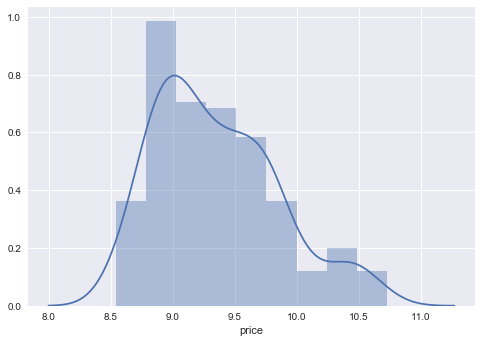

In [127]:
sns.distplot(fit_data.price)                                # Histogram of logged price varible

#### For Size column

In [128]:
fit_data.Size = fit_data.Size.apply(np.log)           # For Size Column


In [129]:
fit_data.Size.skew()

0.8578276737148061

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


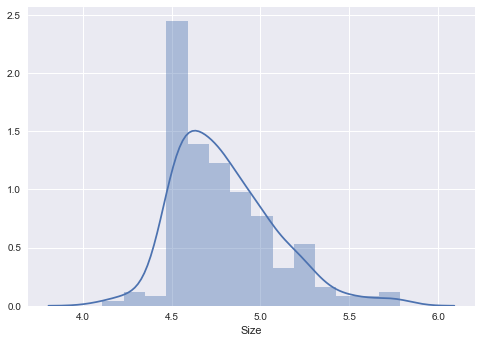

In [130]:
sns.distplot(fit_data.Size)

#### For losses column

In [131]:
fit_data.losses = fit_data.losses.apply(np.log)           # For losses Column


In [132]:
fit_data.losses.skew()

0.03160911126447969

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


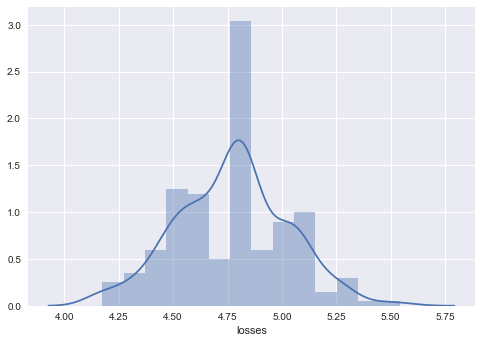

In [133]:
sns.distplot(fit_data.losses)

#### For Base Column

In [134]:
fit_data.base = fit_data.base.apply(np.log)

In [135]:
fit_data.base.skew()

0.8833870334608721

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


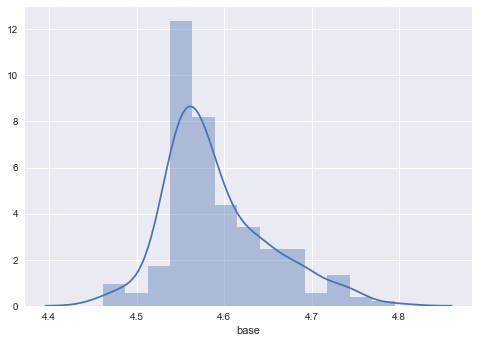

In [136]:
sns.distplot(fit_data.base)

#### For Horsepower column

In [137]:
fit_data.horsepower = fit_data.horsepower.apply(np.log)           # For Size Column


In [138]:
fit_data.horsepower.skew()

0.4706251033391486

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


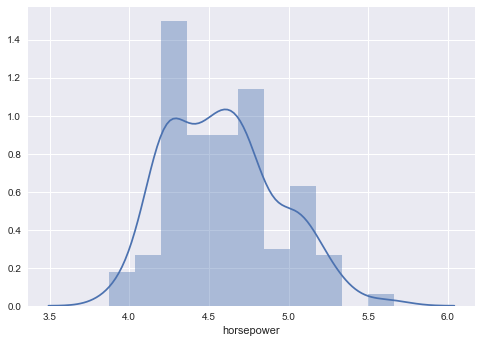

In [139]:
sns.distplot(fit_data.horsepower)

In [140]:
fit_data.columns

Index(['losses', 'base', 'length', 'width', 'height', 'weight', 'Size', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'mlg', 'highway',
       'price', 'make', 'Style', 'wheels', 'engine', 'cylinders', 'fuel',
       'symboling', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doors_four', 'doors_two', 'location_front',
       'location_rear'],
      dtype='object')

In [141]:
x1 = fit_data.iloc[:,np.r_[0:14 , 15:30]]               # Splitting the fit_data data into X1  for independent data

In [142]:
y1 = fit_data.iloc[:,14]                                # Splitting the fit_data data into Y1 for dependent data

In [143]:
x1.head()                                           # First 6 observations of X1 data

,losses,base,length,width,height,weight,Size,bore,stroke,compression,...,fuel,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doors_four,doors_two,location_front,location_rear
0,4.804021,4.484132,168.8,64.1,48.8,2548,4.867534,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
1,4.804021,4.484132,168.8,64.1,48.8,2548,4.867534,3.47,2.68,9.0,...,5,5,0,1,1,0,0,1,1,0
2,4.804021,4.548600,171.2,65.5,52.4,2823,5.023881,2.68,3.47,9.0,...,5,3,0,1,1,0,0,1,1,0
3,5.099866,4.603168,176.6,66.2,54.3,2337,4.691348,3.19,3.40,10.0,...,5,4,0,1,1,0,1,0,1,0
4,5.099866,4.599152,176.6,66.4,54.3,2824,4.912655,3.19,3.40,8.0,...,5,4,0,1,1,0,1,0,1,0


In [144]:
y1.head()                                             # First 6 observations of Y1 data

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

#### Creating Train and Test for x and y

In [145]:
xtrain1 , xtest1 , ytrain1 , ytest1 = train_test_split(x1 , y1 , test_size = .20 , random_state = 101)    # Creating Train and Test data 

In [146]:
print(xtrain1.shape)                                  # Dimensions of created train and test data. 
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(164, 29)
(41, 29)
(164,)
(41,)


#### Fitting the model (Creating the model)

In [147]:
ols_model1 = sm.OLS(ytrain1 , xtrain1).fit()                     # fitting the model

In [148]:
ols_model1.summary()                                             # summary of the data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     45.39
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           1.98e-54
Time:                        10:48:05   Log-Likelihood:                 62.630
No. Observations:                 164   AIC:                            -73.26
Df Residuals:                     138   BIC:                             7.337
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
losses              -0.0232      0.081     -0.287      0.775      -0.184       0.137
base                 0.0879      0.818      0.107      0.915      -1.530       1.706
length               0.0077      0.004      1.926      0.056      -0.000       0.016
width                0.0225      0.018      1.217      0.226      -0.014       0.059
height               0.0175      0.010      1.728      0.086      -0.003       0.038
weight               0.0003      0.000      2.628      0.010    7.31e-05       0.001
Size                 0.2990      0.205      1.460      0.147      -0.106       0.704
bore                -0.0939      0.088     -1.072      0.286      -0.267       0.079
stroke              -0.0882      0.056     -1.586      0.115      -0.198       0.022
compression          0.0473      0.033      1.419      0.158      -0.019       0.113
horsepower           0.1109      0.199      0.556      0.579      -0.283       0.505
peak              6.147e-05   5.62e-05      1.093      0.276   -4.97e-05       0.000
mlg                  0.0086      0.013      0.642      0.522      -0.018       0.035
highway             -0.0082      0.012     -0.667      0.506      -0.032       0.016
make                -0.0133      0.003     -4.888      0.000      -0.019      -0.008
Style               -0.0731      0.027     -2.737      0.007      -0.126      -0.020
wheels               0.0945      0.044      2.152      0.033       0.008       0.181
engine               0.0266      0.016      1.649      0.102      -0.005       0.059
cylinders            0.0302      0.027      1.112      0.268      -0.023       0.084
fuel                 0.0272      0.012      2.264      0.025       0.003       0.051
symboling            0.0230      0.021      1.109      0.269      -0.018       0.064
fueltype_diesel      0.3066      0.864      0.355      0.723      -1.401       2.014
fueltype_gas         0.9193      0.776      1.185      0.238      -0.615       2.454
aspiration_std       0.5675      0.791      0.718      0.474      -0.996       2.131
aspiration_turbo     0.6583      0.785      0.839      0.403      -0.893       2.210
doors_four           0.6538      0.786      0.832      0.407      -0.900       2.208
doors_two            0.5721      0.789      0.725      0.469      -0.987       2.131
location_front       0.3044      0.794      0.383      0.702      -1.266       1.875
location_rear        0.9214      0.786      1.172      0.243      -0.633       2.476
==============================================================================
Omnibus:                       26.392   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.817
Skew:                           0.693   Prob(JB):                     1.69e-13
Kurtosis:                       5.586   Cond. N

#### Predicting the Test data

In [149]:
predicted1 = ols_model1.predict(xtest1)                       

#### Data frame for Actual and Predicted values

In [150]:
frame1 = pd.DataFrame({"Actual":np.exp(ytest1) , "Predicted_OLS": np.exp(predicted1)  })  # Took the Antilog of logged independent variable
frame1.head()

,Actual,Predicted_OLS
120,6229.0,6805.746507
185,8195.0,9323.175295
180,15690.0,17194.748356
119,7957.0,8089.737878
109,12440.0,18441.046077


In [151]:
frame1.Predicted_OLS = round(frame1.Predicted_OLS , 2)                # Rounding of the data in 2 decimals
frame1.head()

,Actual,Predicted_OLS
120,6229.0,6805.75
185,8195.0,9323.18
180,15690.0,17194.75
119,7957.0,8089.74
109,12440.0,18441.05


#### Calculating MSE and RMSE

In [152]:
MSE1= metrics.mean_squared_error(np.exp(ytest1) , np.exp(predicted1))  # MSE
print(MSE1)

5593465.797059103


In [153]:
RMSE1 = pow(MSE1 , .5)      # RMSE
print(RMSE1)

2365.0509079212443


### Building the model based on significant variables

In [154]:
fit_data.columns

Index(['losses', 'base', 'length', 'width', 'height', 'weight', 'Size', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'mlg', 'highway',
       'price', 'make', 'Style', 'wheels', 'engine', 'cylinders', 'fuel',
       'symboling', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doors_four', 'doors_two', 'location_front',
       'location_rear'],
      dtype='object')

In [858]:
sig_x = fit_data.iloc[:,[3,5,6,8,11,12,15,16,19,20,22,23]]          # Taking significant independent variables from norm data

In [859]:
print(sig_x.shape)                                       # dimensions of new X-data and norm data's Y-data  
print(y.shape)


(205, 12)
(205,)


In [860]:
sig_x.columns                                           # sig_x data's column names

Index(['width', 'weight', 'Size', 'stroke', 'peak', 'mlg', 'make', 'Style',
       'cylinders', 'fuel', 'fueltype_diesel', 'fueltype_gas'],
      dtype='object')

#### Train Test split

In [869]:
newxtrain , newxtest, newytrain , newytest = train_test_split(sig_x , y1 , test_size= .20 , random_state = 101)

#### Fitting the model

In [870]:
mod1 = sm.OLS(newytrain , newxtrain).fit()                          # Model fitting

In [877]:
mod1.summary()                                                       # Summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     77.87
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.09e-56
Time:                        15:00:03   Log-Likelihood:                 35.620
No. Observations:                 164   AIC:                            -47.24
Df Residuals:                     152   BIC:                            -10.04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
width               0.0320      0.015      2.148      0.033       0.003       0.061
weight              0.0004      0.000      3.297      0.001       0.000       0.001
Size                0.5767      0.130      4.422      0.000       0.319       0.834
stroke             -0.1852      0.054     -3.458      0.001      -0.291      -0.079
peak                0.0001   4.31e-05      3.232      0.002    5.42e-05       0.000
mlg                -0.0061      0.005     -1.108      0.270      -0.017       0.005
make               -0.0098      0.003     -3.620      0.000      -0.015      -0.004
Style              -0.0424      0.020     -2.165      0.032      -0.081      -0.004
cylinders           0.0569      0.022      2.618      0.010       0.014       0.100
fuel                0.0247      0.012      2.114      0.036       0.002       0.048
fueltype_diesel     3.8405      1.096      3.503      0.001       1.674       6.007
fueltype_gas        3.6205      1.085      3.335      0.001       1.476       5.765
==============================================================================
Omnibus:                        9.510   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.723
Skew:                           0.197   Prob(JB):                     0.000142
Kurtosis:                       4.562   Cond. No.                     5.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Predicting the Test data

In [872]:
mod_pred = mod1.predict(newxtest)                       

#### Data frame for Actual and Predicted values

In [873]:
frame2 = pd.DataFrame({"Actual":np.exp(newytest) , "Predicted_OLS": np.exp(mod_pred)  })  # Took the Antilog of logged independent variable
frame2.head()

,Actual,Predicted_OLS
120,6229.0,7018.138425
185,8195.0,8641.467422
180,15690.0,17935.389950
119,7957.0,8947.513900
109,12440.0,15573.915755


In [874]:
frame2.Predicted_OLS = round(frame2.Predicted_OLS , 2)                # Rounding of the data in 2 decimals
frame2.head()

,Actual,Predicted_OLS
120,6229.0,7018.14
185,8195.0,8641.47
180,15690.0,17935.39
119,7957.0,8947.51
109,12440.0,15573.92


#### Calculating MSE and RMSE

In [875]:
newMSE= metrics.mean_squared_error(np.exp(newytest) , np.exp(mod_pred))  # MSE
print(newMSE)

4283714.3702170355


In [876]:
newRMSE = pow(newMSE , .5)      # RMSE
print(newRMSE)

2069.7135961811323
